In [97]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

Задача 1
Примените алгоритм Metropolis для генерации выборки из распределения с плотностью p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

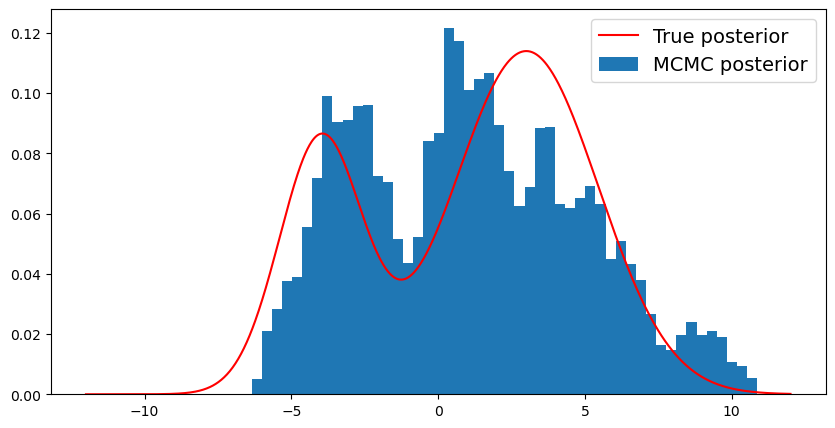

In [118]:
def p(x):
    return 0.3 * norm(-4, np.sqrt(2)).pdf(x) + 0.7 * norm(3, np.sqrt(6)).pdf(x)

x = np.linspace(-12, 12, 1000)
y = p(x)

def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed) / value(current)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

post = metroplis(- 0.5, p, proposal, 30000, 5000, sigma = 0.1)

fig = plt.figure(figsize = (10, 5))
plt.plot(x, y, c = 'r', label = 'True posterior')
fig.patch.set_facecolor('xkcd:white')
plt.hist(post, bins = 50, density = True, label = 'MCMC posterior')
plt.legend(fontsize = 14)
plt.show()

Задача 2

In [142]:
n = 10
initial = np.zeros(n * n).reshape(n, n)

def rand_n(n):
    r = n * np.random.rand()
    return int(r // 1)

def MCMC_graph(init, n, N, nburn):
    G = init
    Arr = [G.copy()]

    for k in range(N - 1):
        i = rand_n(n)
        j = rand_n(n)

        if G[i, j] == 1:
            if np.random.rand() > 0.5:
                G[i, j] = 0
            Arr.append(G.copy())
            continue
        if i > 0:
            if G[i - 1, j] == 1:
                Arr.append(G.copy())
                continue
        if j > 0:
            if G[i, j - 1] == 1:
                Arr.append(G.copy())
                continue
        if i < (n - 1):
            if G[i + 1, j] == 1:
                Arr.append(G.copy())
                continue
        if j < (n - 1):
            if G[i, j + 1] == 1:
                Arr.append(G.copy())
                continue
        if np.random.rand() > 0.5:
            G[i, j] = 1
        Arr.append(G.copy())
    return Arr[nburn:]

N = 100000
nburn = 1000

graphs = MCMC_graph(initial, n, N, nburn) # np.array([np.sum(MCMC_graph(initial, n)) for _ in range(N)])
arr = np.array([graphs[i].sum() for i in range(N - nburn)])
print(arr.mean())

23.85710101010101
